# Свойства оценок. Задача 1

__Ильичёв А.С., 693__

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Зададим массив из значений $\theta$ и сгенерируем выборки $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N=10^4$ и для каждого $\theta$.

In [2]:
N = 10 ** 4
ns = np.arange(1, N + 1)
thetas = [0.5, 1, 5, 13, 27]
# выборки для каждого theta
samples = [np.random.uniform(0, theta, N) for theta in thetas]

#### 2. Для всех $n \le N$ посчитаем оценки параметра $\theta$ из теоретической задачи.

In [3]:
def make_estimator(func): # функция построения массива оценок
    est = []
    for sample in samples:
        est.append([func(sample[:i]) for i in ns])
    return np.array(est)
est = [None] * 5

a) $\hat \theta_0 = 2\overline X$ 

In [4]:
est[0] = make_estimator(lambda x: 2 * np.mean(x))

b) $\hat \theta_1 = \overline X + X_{(n)}/2$

In [5]:
est[1] = make_estimator(lambda x: np.mean(x) + np.max(x) / 2)

c) $\hat \theta_2 = (n+1)X_{(1)}$

In [6]:
est[2] = make_estimator(lambda x: (len(x) + 1) * np.min(x))

d) $\hat \theta_3 = X_{(1)} + X_{(n)}$

In [7]:
est[3] = make_estimator(lambda x: np.max(x) + np.min(x))

e) $\hat \theta_4 = \frac{n+1}n X_{(n)}$

In [8]:
est[4] = make_estimator(lambda x: (len(x) + 1) / len(x) * np.max(x))

#### 3. Построим на одном графике для всех оценок функции модуля разности оценки и истинного значения $\theta$  в зависимости от $n$

In [9]:
def make_plot(theta_num, exclude=set(), limit=True):
    plt.figure(figsize=(10,5))
    est_nums = list(set(np.arange(len(est))) - exclude) # set difference
    for est_num in est_nums:
        plt.plot(ns, np.abs(est[est_num][theta_num] - thetas[theta_num]),
                 label=str(est_num))
    plt.xlabel('n')
    plt.ylabel(r'$|\hat \theta_n - \theta|$')
    plt.legend(title='Номер оценки')
    plt.title(r'$\theta =$'+str(thetas[theta_num]))
    if limit:
        plt.ylim(0, 0.02 * thetas[theta_num])
    plt.show()

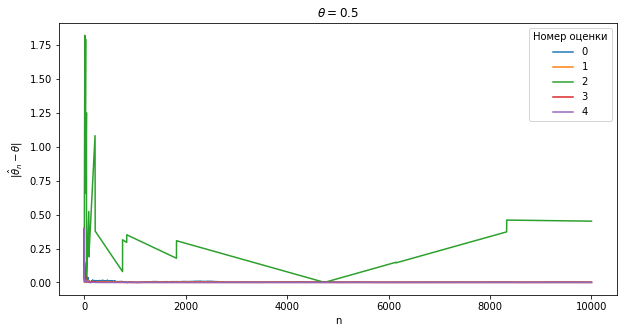

In [10]:
make_plot(theta_num=0, limit=False)

Как видно, оценка $(2)$ сильно отличается от истинных значений $\theta$. Это происходит из-за того, что, как следует из решения теоретической задачи, такая оценка не является состоятельной (и стремится к 0 п.н. при $n \rightarrow \infty$). Исключим ее из рассмотрения и построим графики оценок для всех $\theta$.

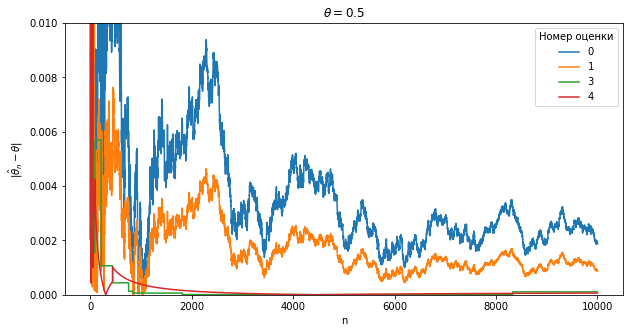

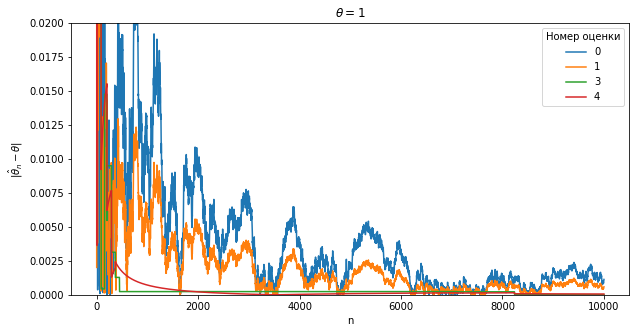

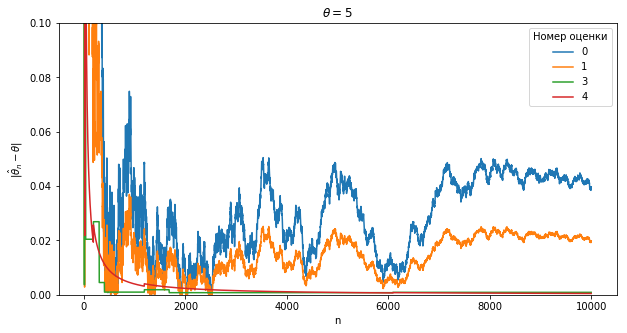

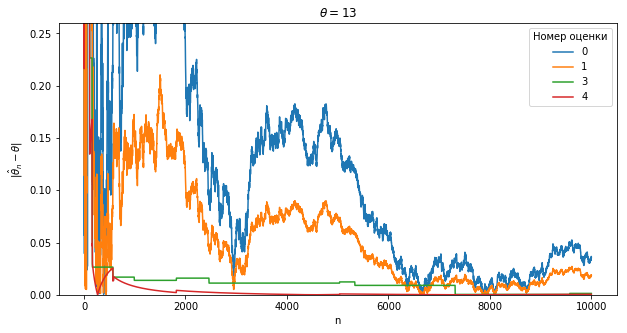

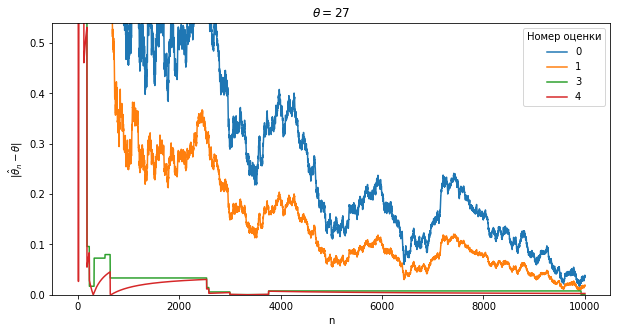

In [11]:
for i, theta in enumerate(thetas):
    make_plot(theta_num=i, exclude={2})

#### 4. Сделаем выводы.

Все оценки, кроме $(3)$, являются состоятельными (из решения теоретической задачи). Как видно из графиков, лучше всего себя ведут оценки $(3)$ и $(4)$, не включающие в себя выборочное среднее. Оценка  $(0)$, состоящая только из выборочного среднего, ведет себя хуже остальных. Скорее всего, это происходит из-за того, что первая и $n$-ая порядковые статистики менее подвержены флуктуациям, т.е. с ростом $n$ (и приближением статистик к границам отрезка) вероятность изменения их значения уменьшается (например, для минимума $P(x < \alpha) = \frac{\alpha}{\theta}$), при этом номер $n$, на котором будет достигнут уровень приближения $|\hat \theta_n - \theta| < \beta \ll 1$, удовлетворяет геометрическому распределению, т.е. уровень убывает экспоненциально с ростом $n$. Это заметно на графике. Выборочное среднее же изменяется с каждым новым измерением (вклад которого пропорционален $1/n$), и потому медленнее сходится к истинному значению $\theta$.